In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('../archivos/ABCcorporation2024.csv', index_col=[0])
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
0,52,no,non-travel,2015.722222,NaN,6,3,NaN,1,1,M,NaN,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,NaN,15,15,1972,195370.00,NaN,NaN
1,53,no,non-travel,2063.388889,NaN,1,4,life sciences,2,3,M,NaN,2,5,manager,3,NaN,16665.83,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,1971,199990.00,NaN,si
2,43,no,travel_rarely,1984.253968,research & development,4,2,technical degree,3,3,M,NaN,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,1981,192320.00,manager - research & development,si
3,48,no,travel_rarely,1771.404762,NaN,2,4,medical,4,1,F,NaN,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,full time,2,NaN,2,NaN,20,NaN,5,6,1976,171690.00,NaN,NaN
4,47,no,non-travel,1582.771346,NaN,3,3,technical degree,5,1,F,NaN,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,1977,153407.04,NaN,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1614 non-null   int64  
 1   attrition                 1614 non-null   object 
 2   businesstravel            1614 non-null   object 
 3   dailyrate                 1614 non-null   float64
 4   department                302 non-null    object 
 5   distancefromhome          1614 non-null   int64  
 6   education                 1614 non-null   int64  
 7   educationfield            869 non-null    object 
 8   employeenumber            1614 non-null   int64  
 9   environmentsatisfaction   1614 non-null   int64  
 10  gender                    1614 non-null   object 
 11  hourlyrate                404 non-null    float64
 12  jobinvolvement            1614 non-null   int64  
 13  joblevel                  1614 non-null   int64  
 14  jobrole      

 - **Grupo A (Control):** Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

  - **Grupo B (Variante):** Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

In [6]:
df['Satisfaccion'] = df['jobsatisfaction'].apply(lambda x: 'Satisfecho' if x >= 3 else 'Insatisfecho')

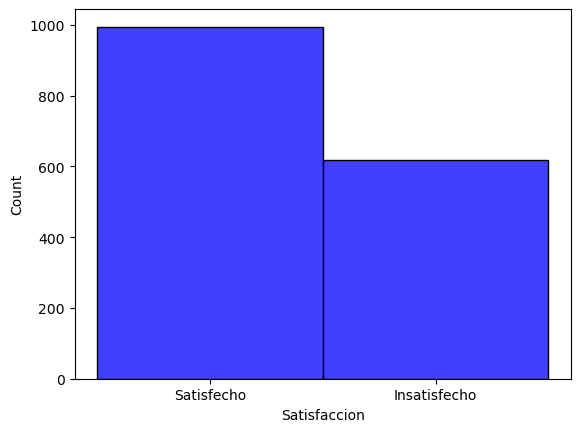

In [7]:
sns.histplot(x = "Satisfaccion", data = df, color = "blue");


In [14]:
tabla_contingencia = pd.crosstab(df['Satisfaccion'], df['attrition'], normalize=True) * 100

In [15]:
tabla_contingencia

attrition,no,yes
Satisfaccion,,
Insatisfecho,30.731103,7.620818
Satisfecho,53.221809,8.426270


In [10]:
chi2_contingency(tabla_contingencia)

Chi2ContingencyResult(statistic=0.2932387508181229, pvalue=0.5881524989252631, dof=1, expected_freq=array([[32.19755424,  6.15436646],
       [51.75535778,  9.89272152]]))

In [11]:
_, p_value, _, _, = chi2_contingency(tabla_contingencia)

print(p_value)

0.5881524989252631


In [12]:
p_value < 0.05

False

No existe una relacion significativa entre la satisfaccion y la rotacion